In [3]:
import numpy as np
import pylab as plt
import scipy.stats as stats
from tqdm.notebook import tqdm

For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
\begin{equation}
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
\label{mirrdef}
\end{equation}
For convenience, let us define 

$$f(\chi) = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}} = \frac{M_{\rm irr}}{M}$$

Suppose you have repeated measurments of $M$ and $\chi$. This is just because we're still frequentists for now. When we will put our Bayesian hat on, these distributions will be the *posterior samples* from a single measurement.

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

These are simplistic assumption that, however, are not too far from what we are now measuring with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.

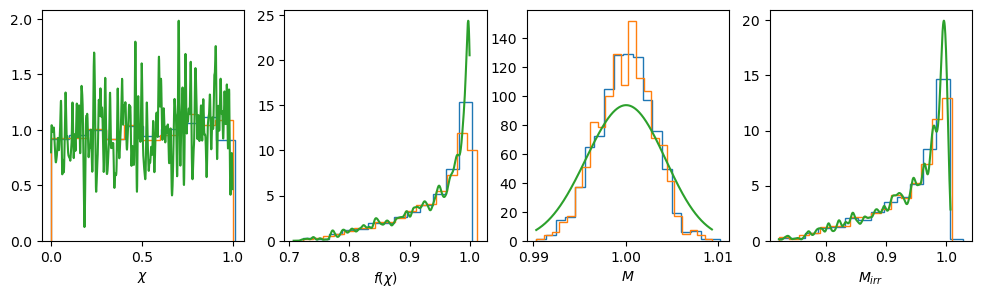

In [65]:
chi = stats.uniform(0,1).rvs(1000)   #random.uniform(0,1,1000)
sigma = 0.003
M = stats.norm(1,sigma).rvs(1000)
f_chi = np.sqrt((1+np.sqrt(1-chi**2))/2)
M_irr = M*f_chi

from astropy.visualization.hist import hist as fancyhist

# Load the KDE module
from sklearn.neighbors import KernelDensity

chi_grid = np.linspace(0,1,1000)
f_chi_grid = np.linspace(np.sqrt(1/2),1,1000)
M_grid = np.linspace(M.min(),M.max(),1000) 
M_irr_grid = np.linspace(M_irr.min(),M_irr.max(),1000) 

def kde_sklearn(data, grid, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(grid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

bw = sigma

fig, ax = plt.subplots(1,4,figsize=(12,3))

_ = fancyhist(chi, bins="scott", histtype="step",density=True,ax=ax[0])
_ = fancyhist(chi, bins="freedman", histtype="step",density=True,ax=ax[0])

kde_spin = kde_sklearn(chi,chi_grid,bandwidth=bw,kernel="gaussian") 
ax[0].plot(chi_grid,kde_spin)

ax[0].set_xlabel("$\chi$")

##
_ = fancyhist(f_chi, bins="scott", histtype="step",density=True,ax=ax[1])
_ = fancyhist(f_chi, bins="freedman", histtype="step",density=True,ax=ax[1])

kde_f_chi = kde_sklearn(f_chi,f_chi_grid,bandwidth=bw,kernel="gaussian") 
ax[1].plot(f_chi_grid,kde_f_chi)

ax[1].set_xlabel("$f(\chi)$")

##
_ = fancyhist(M, bins="scott", histtype="step",density=True,ax=ax[2])
_ = fancyhist(M, bins="freedman", histtype="step",density=True,ax=ax[2])

kde_M = kde_sklearn(M,M_grid,bandwidth=bw,kernel="gaussian") 
ax[2].plot(M_grid,kde_M)

ax[2].set_xlabel("$M$")

##

_ = fancyhist(M_irr, bins="scott", histtype="step",density=True,ax=ax[3])
_ = fancyhist(M_irr, bins="freedman", histtype="step",density=True,ax=ax[3])

kde_M_irr = kde_sklearn(M_irr,M_irr_grid,bandwidth=bw,kernel="gaussian") 
ax[3].plot(M_irr_grid,kde_M_irr)

ax[3].set_xlabel('$M_{irr}$')

plt.show()


In [60]:
scales= np.logspace(-5,5,20) #sigmas
ksM=[]
ksf = []

N=100000
chi = np.random.uniform(0,1,N) #spins
f_chi = np.sqrt((1+np.sqrt(1-chi**2))/2)

for scale in tqdm(scales):

    M=np.random.normal(loc=1,scale=scale,size=N)

    ksM.append(scipy.stats.ks_2samp(M, M*f_chi))        # are M and M_irriducible subject to the same probability distribution?
    ksf.append(scipy.stats.ks_2samp(f_chi, M*f_chi))    # are M and M_irriducible subject to the same probability distribution?

ksM= np.array(ksM)
ksf= np.array(ksf)


  0%|          | 0/20 [00:00<?, ?it/s]

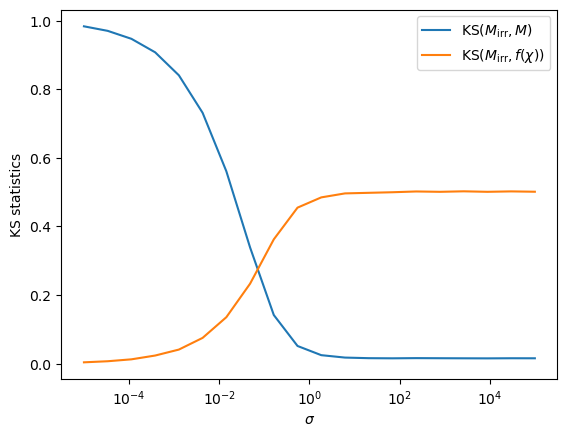

In [64]:
plt.plot(scales,ksM[:,0],label="KS$(M_{\\rm irr}, M)$")
plt.plot(scales,ksf[:,0],label="KS$(M_{\\rm irr}, f(\chi))$")
plt.semilogx()
plt.xlabel("$\sigma$")
plt.ylabel('KS statistics')
plt.legend();

### pdf of M_irr

$$f(\chi) = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}$$

$$pdf(\chi)d\chi = pdf(f)df$$

$$pdf(\chi) = 1$$

$$pdf(f) = 1 \times \frac{d\chi}{df} =  2\frac{2 f^2-1}{\sqrt{1 - f^2}}$$



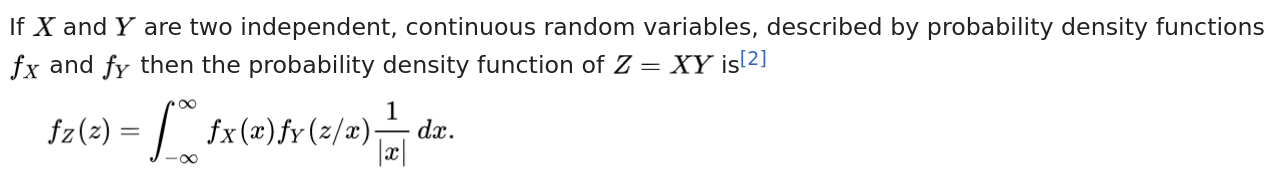

https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables

\begin{equation}
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,. \label{pmirr}
\end{equation}